/Users/mathieu/Documents/Formation_IA/Projets_perso/projet_mnist_fashion/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.7547 - loss: 0.6886 - val_accuracy: 0.8667 - val_loss: 0.3677
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8805 - loss: 0.3341 - val_accuracy: 0.8893 - val_loss: 0.2997
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.8956 - loss: 0.2833 - val_accuracy: 0.8927 - val_loss: 0.2853
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9073 - loss: 0.2490 - val_accuracy: 0.9025 - val_loss: 0.2735
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9179 - loss: 0.2209 - val_accuracy: 0.9080 - val_loss: 0.2615
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9255 - loss: 0.2023 - val_accuracy: 0.9087 - val_loss: 0.2510
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9326 - loss: 0.1835 - val_accuracy: 0.9085 - val_loss: 0.2532
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9357 - loss: 0.1690 - 

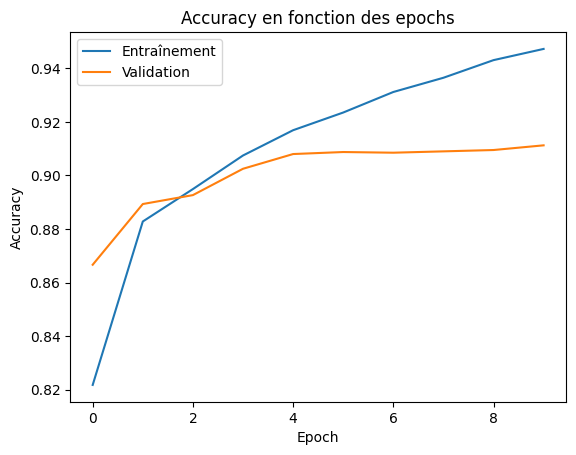

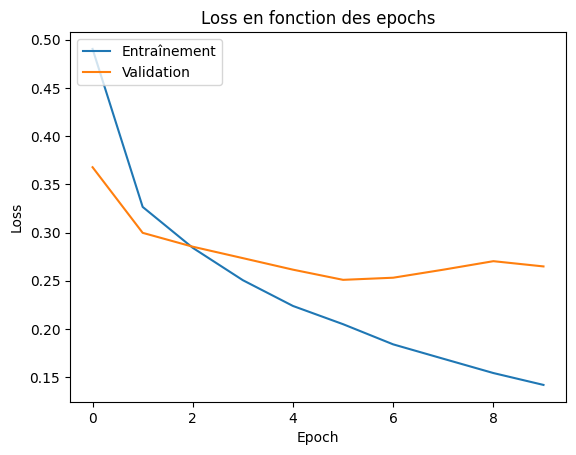

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import fashion_mnist

# Chargement du jeu de données
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Normalisation des données
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape pour ajouter un canal de couleur (noir et blanc = 1 canal)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encoding des labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Création du modèle CNN
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax')) 

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Entraînement du modèle
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2)

# Évaluation du modèle
loss, accuracy = model.evaluate(X_test, y_test)
print("Loss (test):", loss)
print("Accuracy (test):", accuracy)

# Visualisation de l'historique d'entraînement
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy en fonction des epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss en fonction des epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Entraînement', 'Validation'], loc='upper left')
plt.show()